In [5]:
import pandas as pd
#import matplotlib.pyplot as plt
from utils import preprocess

df = pd.read_csv('data/01_input_history.csv')
df.head()

df_train_null, df_train_inactive, df_train_active, df_validation = preprocess.preprocess_ex1(df)

df_train_merged = df_train_active#pd.merge(df_train_active, df_train_inactive, how='outer', on=['unique_id', 'ds', 'Quantity', 'Country', 'Product'])
df_train_static = df_train_merged[['unique_id', 'Country', 'Product']].drop_duplicates().reset_index(drop=True)
df_train_static = pd.get_dummies(df_train_static, columns=['Country', 'Product'], drop_first=True)
assert df_train_static.shape[0] == df_train_merged['unique_id'].nunique(), 'The number of unique_id in static and merged dataframes do not match!'

#df_train_merged = augment_calendar_df(df_train_merged, freq='M')[0]
#df_validation = augment_calendar_df(df_validation, freq='M')[0]
df_train_merged['month'] = df_train_merged['ds'].dt.month
df_validation['month'] = df_validation['ds'].dt.month
df_train_merged = pd.get_dummies(df_train_merged, columns=['month'], drop_first=True)
df_validation = pd.get_dummies(df_validation, columns=['month'], drop_first=True)

In [2]:
sub_df = pd.read_csv('submissions_backup/submission_chronos.csv')
sub_df['unique_id'] = sub_df['Country'] + '_' + sub_df['Product']
sub_df['ds'] = pd.to_datetime(sub_df['Month'], format='%b%Y')

In [3]:
df['unique_id'] = df['Country'] + '_' + df['Product']
df['ds'] = pd.to_datetime(df['Month'], format='%b%Y')

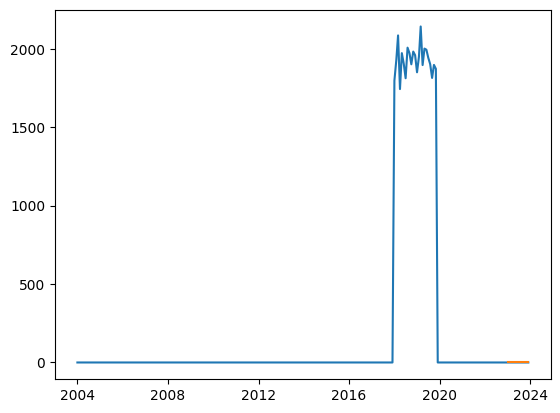

In [4]:
id = "Japan_MorningMint"
#id = 'United Kingdom_RadiantRover Pet Conditioner'
import matplotlib.pyplot as plt

plt.plot(df.loc[df['unique_id'] == id, 'ds'],
         df.loc[df['unique_id'] == id, 'Quantity'], label='Train')
# plt.plot(df_validation.loc[df_validation['unique_id'] == id, 'ds'],
#             df_validation.loc[df_validation['unique_id'] == id, 'Quantity'], label='Validation')
plt.plot(sub_df.loc[sub_df['unique_id'] == id, 'ds'],
            sub_df.loc[sub_df['unique_id'] == id, 'Quantity'], label='Forecast')
